## Testes com base de dados brasil_covid19.csv

Fonte dos dados: https://www.kaggle.com/unanimad/corona-virus-brazil

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as tsaplt


In [2]:
dados_covid19 = pd.read_csv('/home/pedrosergiot/Documents/Corona_virus/brazil_covid19.csv', delimiter=',')

dados_covid19.head()

,date,hour,state,suspects,refuses,cases
0,2020-01-30,16:00,Minas Gerais,1,0,0
1,2020-01-30,16:00,Rio de Janeiro,1,0,0
2,2020-01-30,16:00,Santa Catarina,0,2,0
3,2020-01-30,16:00,São Paulo,3,1,0
4,2020-01-30,16:00,Rio Grande do Sul,2,2,0


In [3]:
len(dados_covid19)

630

In [4]:
len(dados_covid19.dropna())

630

In [5]:
casos_dia = dados_covid19.loc[:][['date','suspects','refuses','cases']].groupby(['date']).sum()

casos_dia.reset_index(inplace=True)

casos_dia

,date,suspects,refuses,cases
0,2020-01-30,9,6,0
1,2020-01-31,13,9,0
2,2020-02-01,16,10,0
3,2020-02-02,16,10,0
4,2020-02-03,14,13,0
5,2020-02-04,13,16,0
6,2020-02-05,11,21,0
7,2020-02-06,18,48,0
8,2020-02-07,8,26,0
9,2020-02-08,8,28,0


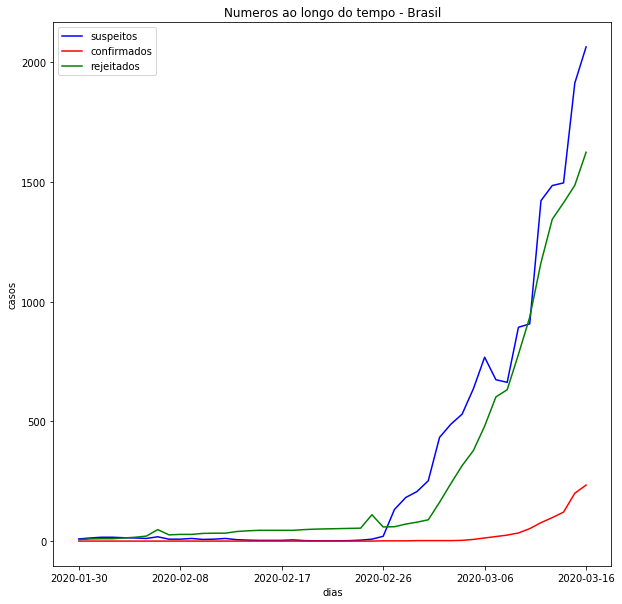

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(casos_dia['date'],casos_dia['suspects'],color='blue')
ax.plot(casos_dia['date'],casos_dia['cases'],color='red')
ax.plot(casos_dia['date'],casos_dia['refuses'],color='green')
ax.set_title('Numeros ao longo do tempo - Brasil')
ax.legend(['suspeitos','confirmados','rejeitados'])
ax.set_xlabel('dias')
ax.set_ylabel('casos')
plt.xticks(range(0,len(casos_dia),9));

## Regressao

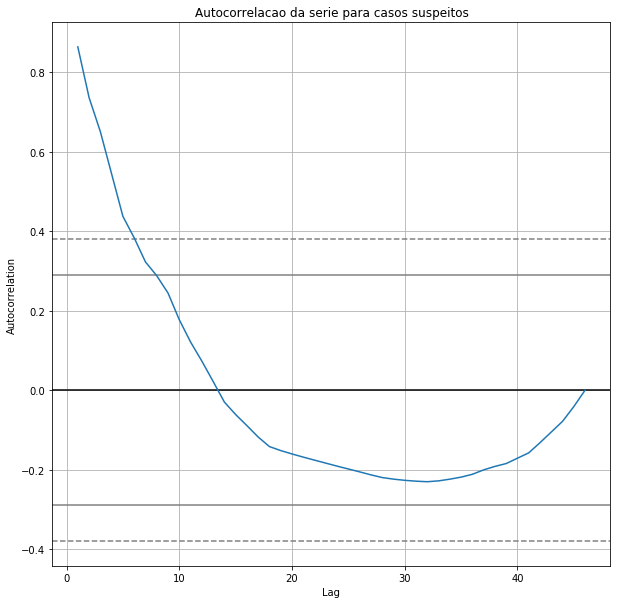

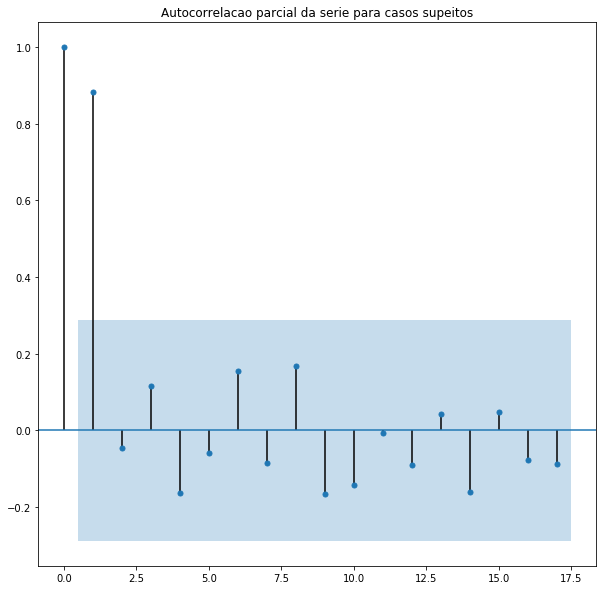

In [20]:
fig1, ax1 = plt.subplots(figsize=(10,10))
fig2, ax2 = plt.subplots(figsize=(10,10))
pd.plotting.autocorrelation_plot(casos_dia.loc[:]['suspects'],ax=ax1)
tsaplt.plot_pacf(casos_dia.loc[:]['suspects'],ax=ax2)
ax1.set_title('Autocorrelacao da serie para casos suspeitos');
ax2.set_title('Autocorrelacao parcial da serie para casos supeitos');

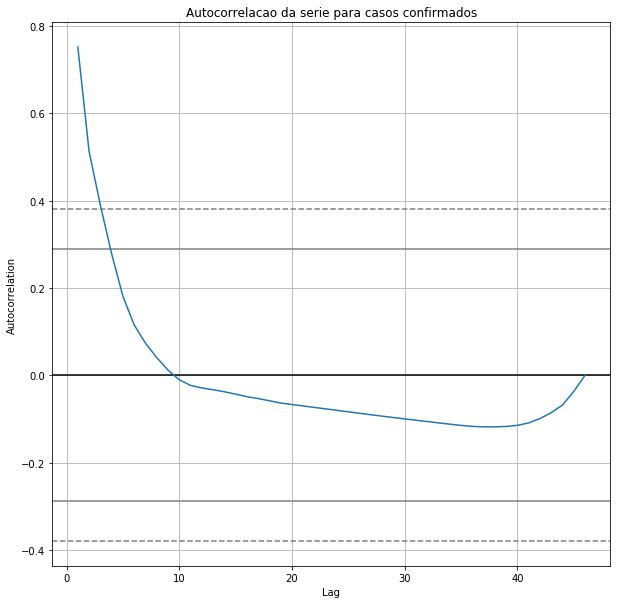

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
pd.plotting.autocorrelation_plot(casos_dia.loc[:]['cases'],ax=ax)
ax.set_title('Autocorrelacao da serie para casos confirmados');

/home/pedrosergiot/deep_learning_2/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


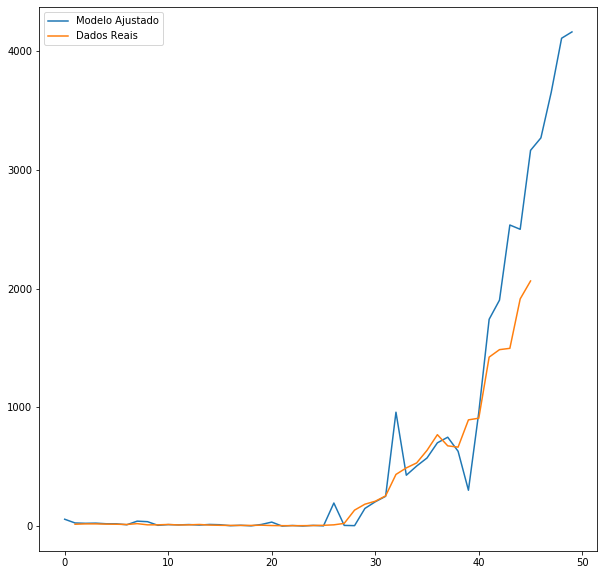

In [99]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

folds = TimeSeriesSplit(n_splits=5)
error = []

model = ARIMA(casos_dia.loc[0:41]['suspects'].values,order=(3,1,1))
fit_results = model.fit(disp=0)
test_results = fit_results.predict(1,50,typ='levels')

fig, ax = plt.subplots(figsize=(10,10))

ax.plot(test_results)
ax.plot(casos_dia.loc[1:45]['suspects'])
ax.legend(['Modelo Ajustado','Dados Reais']);


#for train,test in folds.split(casos_dia.loc[:]['suspects']):
#    print(test)
#    print(train)
#    model = ARIMA(casos_dia.loc[train]['suspects'].values,order=(1,1,0))
#    fit_results = model.fit(disp=0)
#    test_results = fit_results.predict(test[0],test[-1],typ='levels')
#    error.append(mean_squared_error(casos_dia.loc[test]['suspects'].values, test_results))

#    print(error)

#plt.plot(error)

